In this assignment students need to predict whether a person makes over
50K per year or not from classic adult dataset using XGBoost. The
description of the dataset is as follows:<br><br>
Data Set Information:<br><br>
Extraction was done by Barry Becker from the 1994 Census
database. A set of reasonably clean records was extracted using the
following conditions: ((AAGE>16) && (AGI>100) &&
(AFNLWGT>1)&& (HRSWK>0))<br><br>
Attribute Information:<br><br>
- Listing of attributes: >50K, <=50K.<br>
-age: continuous.<br>
-workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
Local-gov, State-gov, Without-pay, Never-worked.<br>
-fnlwgt: continuous.<br>
-education: Bachelors, Some-college, 11th, HS-grad, Prof-school,
Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,
Doctorate, 5th-6th, Preschool.<br>
-education-num: continuous.<br>
-marital-status: Married-civ-spouse, Divorced, Never-married,
Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
-occupation: Tech-support, Craft-repair, Other-service, Sales, Execmanagerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,
Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,
Protective-serv, Armed-Forces.<br>
-relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,
Unmarried.<br>
-race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
-sex: Female, Male.<br>
-capital-gain: continuous.<br>
-capital-loss: continuous.<br>
-hours-per-week: continuous.<br>
-native-country: United-States, Cambodia, England, Puerto-Rico,
Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,
Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,
Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, ElSalvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [1]:
import numpy as np
import pandas as pd
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels


In [2]:
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
train_set['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [4]:
train_set.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
wage_class           0
dtype: int64

In [5]:
train_set.shape

(32561, 15)

In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
train_set.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [8]:
(train_set == ' ?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
wage_class           0
dtype: int64

In [9]:
#removing '?' containing rows
train_set = train_set[(train_set != ' ?').all(axis = 1)]

In [10]:
(train_set == ' ?').all().sum()

0

In [11]:
train_set_copy = train_set.copy()

In [12]:
train_set['wage_class'] = train_set['wage_class'].astype('category')

<ipython-input-12-a17848114991>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['wage_class'] = train_set['wage_class'].astype('category')


In [13]:
train_set.dtypes

age                  int64
workclass           object
fnlwgt               int64
education           object
education_num        int64
marital_status      object
occupation          object
relationship        object
race                object
sex                 object
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country      object
wage_class        category
dtype: object

In [14]:
train_set['wage_class']=train_set['wage_class'].cat.codes

<ipython-input-14-97fcb3fa039c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['wage_class']=train_set['wage_class'].cat.codes


In [15]:
train_set_copy.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [16]:
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


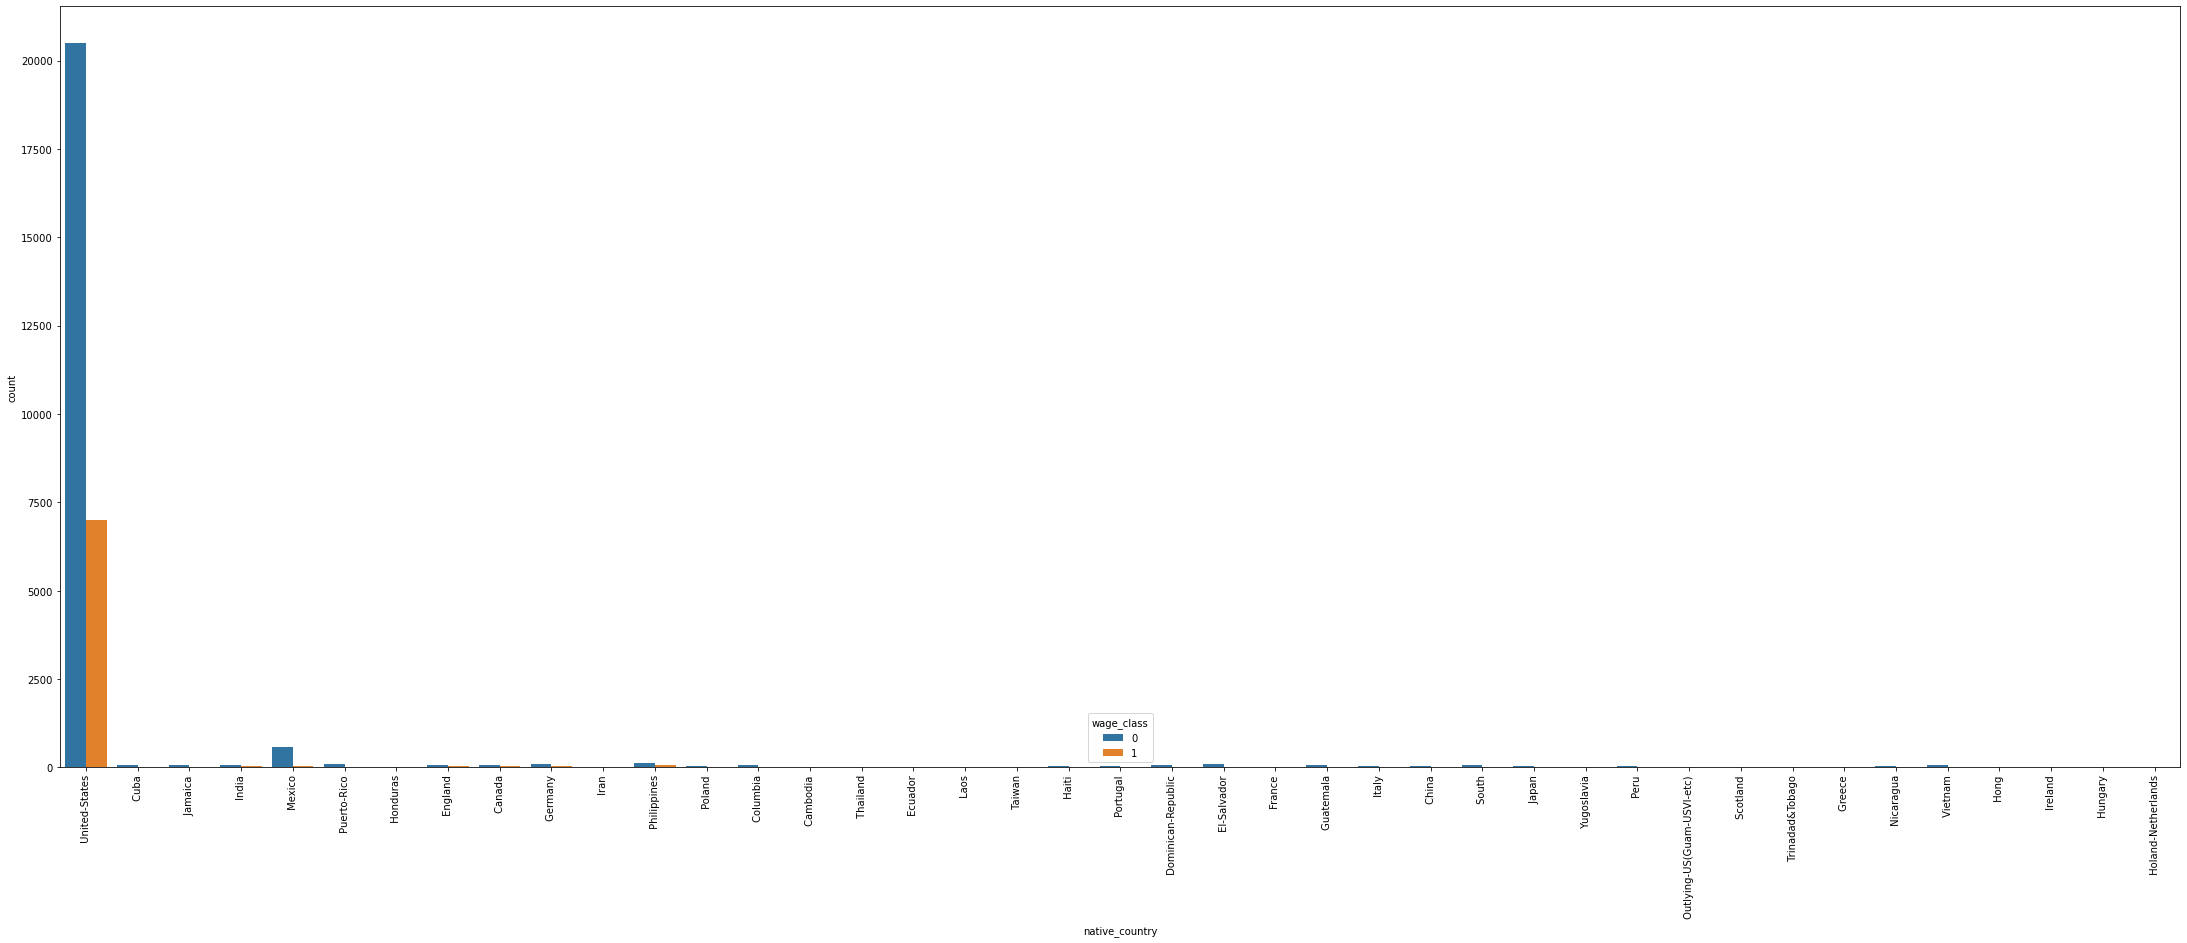

In [17]:
#explore which country do most people belong
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(38,14))
sns.countplot(x='native_country',hue = 'wage_class',data= train_set)
plt.xticks(rotation = 90)
plt.show()

In [18]:
train_set.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [19]:
cat_features = train_set.select_dtypes(include = 'object').apply(lambda x: x.str.strip())

In [20]:
num_features = train_set.select_dtypes(exclude = 'object')

In [21]:
train_set = pd.concat([num_features, cat_features], axis = 1)

In [22]:
train_set.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [23]:
train_set

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,39,77516,13,2174,0,40,0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,50,83311,13,0,0,13,0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,38,215646,9,0,0,40,0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,53,234721,7,0,0,40,0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,28,338409,13,0,0,40,0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,40,154374,9,0,0,40,1,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,58,151910,9,0,0,40,0,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,22,201490,9,0,0,20,0,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


C:\Users\SHAKEB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x720 with 0 Axes>

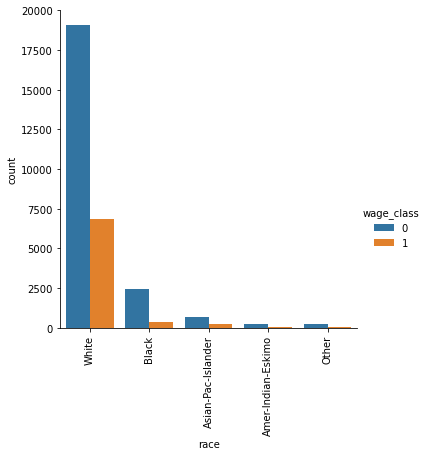

In [24]:
plt.figure(figsize = (30,10))
sns.catplot('race', kind = 'count',hue = 'wage_class',data = train_set)
plt.xticks(rotation = 90)
plt.show()

In [25]:
train_set['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [26]:
#we can reformat marital.status values to single and married
train_set['marital_status'].unique().tolist()

['Never-married',
 'Married-civ-spouse',
 'Divorced',
 'Married-spouse-absent',
 'Separated',
 'Married-AF-spouse',
 'Widowed']

In [27]:
dic = {'Never-married': 'Single',
 'Married-civ-spouse': 'Married',
 'Divorced': 'Single',
 'Married-spouse-absent': 'Single',
 'Separated' : 'Single',
 'Married-AF-spouse': 'Married',
 'Widowed': 'Single'}


In [28]:
train_set['marital_status']= train_set['marital_status'].map({'Never-married': 'Single',
                             'Married-civ-spouse': 'Married',
                             'Divorced': 'Single',
                             'Married-spouse-absent': 'Single',
                             'Separated' : 'Single',
                             'Married-AF-spouse': 'Married',
                             'Widowed': 'Single'})

In [29]:
train_set.marital_status.unique()

array(['Single', 'Married'], dtype=object)

In [30]:
train_set.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [31]:
dic = {'State-gov': 'Govt', 'Self-emp-not-inc': 'Business', 'Federal-gov':'Govt',
       'Local-gov': 'Govt', 'Self-emp-inc':'Business', 'Without-pay':'Unemployed'}

In [32]:
train_set.workclass = train_set.workclass.replace({'State-gov': 'Govt', 'Self-emp-not-inc': 'Business', 'Federal-gov':'Govt',
       'Local-gov': 'Govt', 'Self-emp-inc':'Business', 'Without-pay':'Unemployed'})

In [33]:
train_set.workclass.unique()

array(['Govt', 'Business', 'Private', 'Unemployed'], dtype=object)

In [34]:
train_set.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

In [35]:
dic = {'HS-grad': 'High_Shool', '11th':'High_School','9th':'Illiterate', 'Some-college':'Bachelors',
       'Assoc-acdm':'Masters', '7th-8th':'Illiterate', 'Assoc-voc':'Bachelors', 'Prof-school':'Bachelors',
       '5th-6th':'Illiterate', '10th':'Illiterate', 'Preschool':'Illiterate', '12th':'High_School', '1st-4th':'Illiterate'}

In [36]:
train_set.education= train_set.education.replace({'HS-grad': 'High_School', '11th':'High_School','9th':'Illiterate', 'Some-college':'Bachelors',
       'Assoc-acdm':'Masters', '7th-8th':'Illiterate', 'Assoc-voc':'Bachelors', 'Prof-school':'Bachelors',
       '5th-6th':'Illiterate', '10th':'Illiterate', 'Preschool':'Illiterate', '12th':'High_School', '1st-4th':'Illiterate'})

In [37]:
train_set.education.unique()

array(['Bachelors', 'High_School', 'Masters', 'Illiterate', 'Doctorate'],
      dtype=object)

In [38]:
train_set

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,39,77516,13,2174,0,40,0,Govt,Bachelors,Single,Adm-clerical,Not-in-family,White,Male,United-States
1,50,83311,13,0,0,13,0,Business,Bachelors,Married,Exec-managerial,Husband,White,Male,United-States
2,38,215646,9,0,0,40,0,Private,High_School,Single,Handlers-cleaners,Not-in-family,White,Male,United-States
3,53,234721,7,0,0,40,0,Private,High_School,Married,Handlers-cleaners,Husband,Black,Male,United-States
4,28,338409,13,0,0,40,0,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,Private,Masters,Married,Tech-support,Wife,White,Female,United-States
32557,40,154374,9,0,0,40,1,Private,High_School,Married,Machine-op-inspct,Husband,White,Male,United-States
32558,58,151910,9,0,0,40,0,Private,High_School,Single,Adm-clerical,Unmarried,White,Female,United-States
32559,22,201490,9,0,0,20,0,Private,High_School,Single,Adm-clerical,Own-child,White,Male,United-States


In [39]:
train_set.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving',
       'Farming-fishing', 'Machine-op-inspct', 'Tech-support',
       'Craft-repair', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [40]:
from sklearn.preprocessing import LabelEncoder
for column in train_set:
    enc=LabelEncoder()
    if train_set.dtypes[column]== 'object':
         train_set[column]=enc.fit_transform(train_set[column])


In [41]:
train_set

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,39,77516,13,2174,0,40,0,1,0,1,0,1,4,1,38
1,50,83311,13,0,0,13,0,0,0,0,3,0,4,1,38
2,38,215646,9,0,0,40,0,2,2,1,5,1,4,1,38
3,53,234721,7,0,0,40,0,2,2,0,5,0,2,1,38
4,28,338409,13,0,0,40,0,2,0,0,9,5,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,2,4,0,12,5,4,0,38
32557,40,154374,9,0,0,40,1,2,2,0,6,0,4,1,38
32558,58,151910,9,0,0,40,0,2,2,1,0,4,4,0,38
32559,22,201490,9,0,0,20,0,2,2,1,0,3,4,1,38


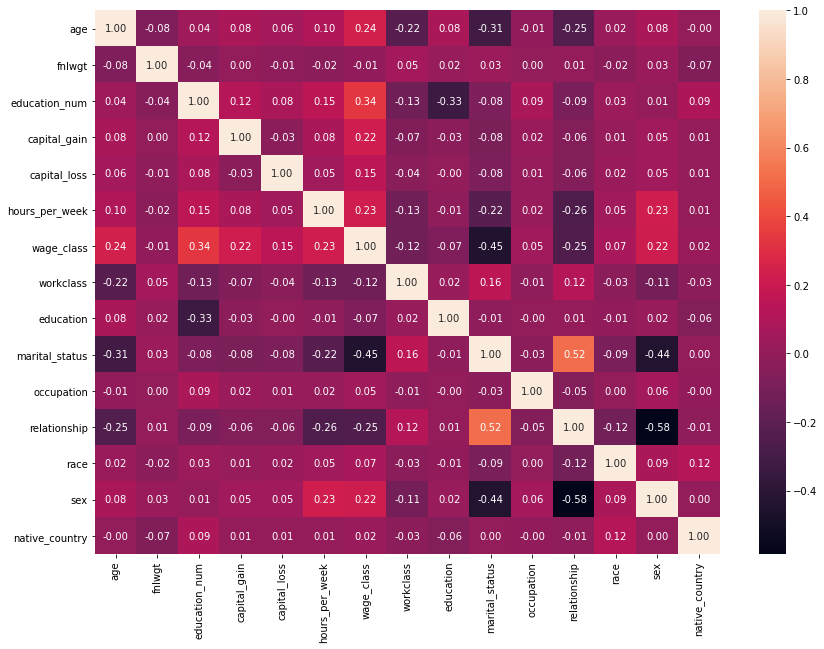

In [42]:
plt.figure(figsize=(14,10))
sns.heatmap(train_set.corr(),annot=True,fmt='.2f')
plt.show()

As we can see from the heatmap "education" and "education_num" are highly correlated, same can be said about the "marital_status" and "relationship" ,thus,we can drop "relationship" and "education_num".

In [43]:
train_set = train_set.drop(['relationship','education_num','occupation','fnlwgt','native_country' ],axis=1)

In [44]:
train_set

,age,capital_gain,capital_loss,hours_per_week,wage_class,workclass,education,marital_status,race,sex
0,39,2174,0,40,0,1,0,1,4,1
1,50,0,0,13,0,0,0,0,4,1
2,38,0,0,40,0,2,2,1,4,1
3,53,0,0,40,0,2,2,0,2,1
4,28,0,0,40,0,2,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,0,0,38,0,2,4,0,4,0
32557,40,0,0,40,1,2,2,0,4,1
32558,58,0,0,40,0,2,2,1,4,0
32559,22,0,0,20,0,2,2,1,4,1


In [45]:
train_set = train_set.drop(['capital_gain', 'capital_loss', 'race'], axis = 1)

In [46]:
train_set.head()

,age,hours_per_week,wage_class,workclass,education,marital_status,sex
0,39,40,0,1,0,1,1
1,50,13,0,0,0,0,1
2,38,40,0,2,2,1,1
3,53,40,0,2,2,0,1
4,28,40,0,2,0,0,0


In [70]:
X = train_set.drop(['wage_class'], axis = 1)
y = train_set['wage_class']

In [71]:
X

,age,hours_per_week,workclass,education,marital_status,sex
0,39,40,1,0,1,1
1,50,13,0,0,0,1
2,38,40,2,2,1,1
3,53,40,2,2,0,1
4,28,40,2,0,0,0
...,...,...,...,...,...,...
32556,27,38,2,4,0,0
32557,40,40,2,2,0,1
32558,58,40,2,2,1,0
32559,22,20,2,2,1,1


In [77]:
pd.get_dummies(X, columns = ['workclass','education'], drop_first = True )

,age,hours_per_week,marital_status,sex,workclass_1,workclass_2,workclass_3,education_1,education_2,education_3,education_4
0,39,40,1,1,1,0,0,0,0,0,0
1,50,13,0,1,0,0,0,0,0,0,0
2,38,40,1,1,0,1,0,0,1,0,0
3,53,40,0,1,0,1,0,0,1,0,0
4,28,40,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,0,0,0,1,0,0,0,0,1
32557,40,40,0,1,0,1,0,0,1,0,0
32558,58,40,1,0,0,1,0,0,1,0,0
32559,22,20,1,1,0,1,0,0,1,0,0


In [51]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: wage_class, Length: 30162, dtype: int8

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)


array([[ 0.04279571, -0.07773411, -0.90332692, -0.99769485,  0.93606249,
         0.69280616],
       [ 0.88028814, -2.3315307 , -2.35715256, -0.99769485, -1.06830474,
         0.69280616],
       [-0.03333996, -0.07773411,  0.55049873,  0.49228966,  0.93606249,
         0.69280616],
       ...,
       [ 1.48937355, -0.07773411,  0.55049873,  0.49228966,  0.93606249,
        -1.44340518],
       [-1.25151078, -1.74721307,  0.55049873,  0.49228966,  0.93606249,
         0.69280616],
       [ 1.0325595 , -0.07773411, -2.35715256,  0.49228966, -1.06830474,
        -1.44340518]])

In [81]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(scaled_X,y,test_size=0.3,random_state=42)

In [84]:
clf = XGBClassifier()
clf.fit(train_x,train_y)

C:\Users\SHAKEB\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:39:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
# cheking training accuracy
from sklearn.metrics import accuracy_score
y_pred = clf.predict(train_x)
accuracy = accuracy_score(train_y, y_pred)
accuracy

0.8425614550277081

In [91]:
y_pred = clf.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
accuracy

0.8115813902088629

In [92]:
from sklearn.model_selection import GridSearchCV


In [93]:
param_grid = {
    
    'learning_rate':[0.0001, 0.001, 0.03,0.3,0.5,0.7],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [95]:
grid= GridSearchCV(XGBClassifier() ,param_grid, verbose=3)

In [96]:
grid.fit(train_x, train_y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] learning_rate=0.0001, max_depth=3, n_estimators=10 ..............
[15:57:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.0001, max_depth=3, n_estimators=10, score=0.809, total=   0.0s
[CV] learning_rate=0.0001, max_depth=3, n_estimators=10 ..............
[15:57:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.0001, max_depth=3, n_estimators=10, score=0.814, total=   0.0s
[CV] l

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\SHAKEB\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] learning_rate=0.0001, max_depth=3, n_estimators=50 ..............
[15:57:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.0001, max_depth=3, n_estimators=50, score=0.814, total=   0.1s
[CV] learning_rate=0.0001, max_depth=3, n_estimators=50 ..............
[15:57:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.0001, max_depth=3, n_estimators=50, score=0.811, total=   0.1s
[CV] learning_rate=0.0001, max_depth=3, n_estimators=50 ...........

[CV]  learning_rate=0.0001, max_depth=5, n_estimators=50, score=0.812, total=   0.1s
[CV] learning_rate=0.0001, max_depth=5, n_estimators=50 ..............
[15:57:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.0001, max_depth=5, n_estimators=50, score=0.817, total=   0.1s
[CV] learning_rate=0.0001, max_depth=5, n_estimators=50 ..............
[15:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.0001, max_depth=5, n_estimators=50, score=0.81

[CV]  learning_rate=0.0001, max_depth=10, n_estimators=50, score=0.804, total=   0.3s
[CV] learning_rate=0.0001, max_depth=10, n_estimators=50 .............
[15:57:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.0001, max_depth=10, n_estimators=50, score=0.805, total=   0.3s
[CV] learning_rate=0.0001, max_depth=10, n_estimators=50 .............
[15:57:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.0001, max_depth=10, n_estimators=50, score=0

[CV]  learning_rate=0.0001, max_depth=20, n_estimators=10, score=0.795, total=   0.1s
[CV] learning_rate=0.0001, max_depth=20, n_estimators=10 .............
[15:57:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.0001, max_depth=20, n_estimators=10, score=0.800, total=   0.1s
[CV] learning_rate=0.0001, max_depth=20, n_estimators=50 .............
[15:57:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.0001, max_depth=20, n_estimators=50, score=0

[CV]  learning_rate=0.001, max_depth=3, n_estimators=50, score=0.814, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, n_estimators=50 ...............
[15:57:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50, score=0.811, total=   0.1s
[CV] learning_rate=0.001, max_depth=3, n_estimators=50 ...............
[15:57:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50, score=0.819, 

[CV]  learning_rate=0.001, max_depth=5, n_estimators=50, score=0.812, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=50 ...............
[15:57:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50, score=0.817, total=   0.1s
[CV] learning_rate=0.001, max_depth=5, n_estimators=50 ...............
[15:57:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50, score=0.814, 

[CV]  learning_rate=0.001, max_depth=10, n_estimators=50, score=0.805, total=   0.3s
[CV] learning_rate=0.001, max_depth=10, n_estimators=50 ..............
[15:57:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=10, n_estimators=50, score=0.803, total=   0.3s
[CV] learning_rate=0.001, max_depth=10, n_estimators=50 ..............
[15:57:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=10, n_estimators=50, score=0.80

[CV]  learning_rate=0.001, max_depth=20, n_estimators=10, score=0.797, total=   0.1s
[CV] learning_rate=0.001, max_depth=20, n_estimators=10 ..............
[15:58:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=20, n_estimators=10, score=0.797, total=   0.1s
[CV] learning_rate=0.001, max_depth=20, n_estimators=50 ..............
[15:58:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=20, n_estimators=50, score=0.79

[15:58:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.03, max_depth=3, n_estimators=50, score=0.817, total=   0.1s
[CV] learning_rate=0.03, max_depth=3, n_estimators=50 ................
[15:58:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.03, max_depth=3, n_estimators=50, score=0.814, total=   0.1s
[CV] learning_rate=0.03, max_depth=3, n_estimators=50 ................
[15:58:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_relea

[CV]  learning_rate=0.03, max_depth=5, n_estimators=50, score=0.816, total=   0.1s
[CV] learning_rate=0.03, max_depth=5, n_estimators=50 ................
[15:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.03, max_depth=5, n_estimators=50, score=0.819, total=   0.1s
[CV] learning_rate=0.03, max_depth=5, n_estimators=50 ................
[15:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.03, max_depth=5, n_estimators=50, score=0.813, tot

[CV]  learning_rate=0.03, max_depth=10, n_estimators=50, score=0.807, total=   0.3s
[CV] learning_rate=0.03, max_depth=10, n_estimators=50 ...............
[15:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.03, max_depth=10, n_estimators=50, score=0.806, total=   0.3s
[CV] learning_rate=0.03, max_depth=10, n_estimators=50 ...............
[15:58:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.03, max_depth=10, n_estimators=50, score=0.810, 

[CV]  learning_rate=0.03, max_depth=20, n_estimators=10, score=0.802, total=   0.1s
[CV] learning_rate=0.03, max_depth=20, n_estimators=10 ...............
[15:58:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.03, max_depth=20, n_estimators=10, score=0.797, total=   0.1s
[CV] learning_rate=0.03, max_depth=20, n_estimators=50 ...............
[15:58:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.03, max_depth=20, n_estimators=50, score=0.801, 

[15:59:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.3, max_depth=3, n_estimators=50, score=0.819, total=   0.1s
[CV] learning_rate=0.3, max_depth=3, n_estimators=50 .................
[15:59:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.3, max_depth=3, n_estimators=50, score=0.816, total=   0.1s
[CV] learning_rate=0.3, max_depth=3, n_estimators=50 .................
[15:59:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release

[CV]  learning_rate=0.3, max_depth=5, n_estimators=50, score=0.813, total=   0.1s
[CV] learning_rate=0.3, max_depth=5, n_estimators=50 .................
[15:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.3, max_depth=5, n_estimators=50, score=0.816, total=   0.1s
[CV] learning_rate=0.3, max_depth=5, n_estimators=50 .................
[15:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.3, max_depth=5, n_estimators=50, score=0.816, total=

[CV]  learning_rate=0.3, max_depth=10, n_estimators=50, score=0.805, total=   0.2s
[CV] learning_rate=0.3, max_depth=10, n_estimators=50 ................
[15:59:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.3, max_depth=10, n_estimators=50, score=0.800, total=   0.2s
[CV] learning_rate=0.3, max_depth=10, n_estimators=50 ................
[15:59:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.3, max_depth=10, n_estimators=50, score=0.801, tot

[CV]  learning_rate=0.3, max_depth=20, n_estimators=10, score=0.793, total=   0.2s
[CV] learning_rate=0.3, max_depth=20, n_estimators=10 ................
[15:59:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.3, max_depth=20, n_estimators=10, score=0.797, total=   0.1s
[CV] learning_rate=0.3, max_depth=20, n_estimators=50 ................
[15:59:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.3, max_depth=20, n_estimators=50, score=0.796, tot

[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.819, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[15:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.816, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[15:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.814, total=

[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.812, total=   0.1s
[CV] learning_rate=0.5, max_depth=5, n_estimators=50 .................
[15:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.815, total=   0.1s
[CV] learning_rate=0.5, max_depth=5, n_estimators=50 .................
[15:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.812, total=

[CV]  learning_rate=0.5, max_depth=10, n_estimators=50, score=0.801, total=   0.2s
[CV] learning_rate=0.5, max_depth=10, n_estimators=50 ................
[15:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=50, score=0.792, total=   0.2s
[CV] learning_rate=0.5, max_depth=10, n_estimators=50 ................
[15:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=50, score=0.797, tot

[CV]  learning_rate=0.5, max_depth=20, n_estimators=10, score=0.786, total=   0.1s
[CV] learning_rate=0.5, max_depth=20, n_estimators=10 ................
[15:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=20, n_estimators=10, score=0.795, total=   0.1s
[CV] learning_rate=0.5, max_depth=20, n_estimators=50 ................
[15:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=20, n_estimators=50, score=0.790, tot

[CV]  learning_rate=0.7, max_depth=3, n_estimators=50, score=0.816, total=   0.1s
[CV] learning_rate=0.7, max_depth=3, n_estimators=50 .................
[15:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.7, max_depth=3, n_estimators=50, score=0.816, total=   0.1s
[CV] learning_rate=0.7, max_depth=3, n_estimators=50 .................
[15:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.7, max_depth=3, n_estimators=50, score=0.813, total=

[CV]  learning_rate=0.7, max_depth=5, n_estimators=50, score=0.805, total=   0.1s
[CV] learning_rate=0.7, max_depth=5, n_estimators=50 .................
[16:00:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.7, max_depth=5, n_estimators=50, score=0.808, total=   0.1s
[CV] learning_rate=0.7, max_depth=5, n_estimators=50 .................
[16:00:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.7, max_depth=5, n_estimators=50, score=0.811, total=

[CV]  learning_rate=0.7, max_depth=10, n_estimators=50, score=0.794, total=   0.3s
[CV] learning_rate=0.7, max_depth=10, n_estimators=50 ................
[16:00:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.7, max_depth=10, n_estimators=50, score=0.789, total=   0.3s
[CV] learning_rate=0.7, max_depth=10, n_estimators=50 ................
[16:00:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.7, max_depth=10, n_estimators=50, score=0.789, tot

[CV]  learning_rate=0.7, max_depth=20, n_estimators=10, score=0.789, total=   0.1s
[CV] learning_rate=0.7, max_depth=20, n_estimators=10 ................
[16:00:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.7, max_depth=20, n_estimators=10, score=0.794, total=   0.1s
[CV] learning_rate=0.7, max_depth=20, n_estimators=50 ................
[16:00:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.7, max_depth=20, n_estimators=50, score=0.788, tot

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  3.1min finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [97]:
grid.best_params_

{'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 100}

In [98]:
new_model = XGBClassifier(learning_rate= 0.03, max_depth= 3, n_estimators= 100)
new_model.fit(train_x, train_y)

[16:02:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
y_pred_new = new_model.predict(test_x)
accuracy_new = accuracy_score(test_y, y_pred_new)
accuracy_new

0.8148966736655984

In [101]:
train_x

array([[-0.26174699, -0.07773411,  0.55049873,  0.49228966, -1.06830474,
         0.69280616],
       [-1.1753751 , -0.07773411,  0.55049873,  0.49228966, -1.06830474,
         0.69280616],
       [ 0.04279571,  1.59174484,  0.55049873, -0.99769485, -1.06830474,
        -1.44340518],
       ...,
       [-0.10947564,  4.84722881,  0.55049873,  0.49228966, -1.06830474,
         0.69280616],
       [ 1.3371022 , -0.07773411, -2.35715256,  0.49228966, -1.06830474,
        -1.44340518],
       [ 1.18483085, -0.07773411, -2.35715256, -0.99769485, -1.06830474,
         0.69280616]])

In [124]:
import pickle
filename = 'xgboost_model.pickle'
pickle.dump(new_model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

In [125]:
# we'll save the scaler object as well for prediction
filename_scaler = 'scaler_model.pickle'
pickle.dump(scaler, open(filename_scaler, 'wb'))

scaler_model = pickle.load(open(filename_scaler, 'rb'))

In [128]:
# Trying a random prediction
d=scaler_model.transform([[6,52,72,85,80,33]])
pred=loaded_model.predict(d)
print('This data belongs to class :',pred[0])

This data belongs to class : 0
